<a href="https://colab.research.google.com/github/Aleksandr62aa/Test_task/blob/main/FC_NN_class_MNIST_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification of handwritten numbers by a fully connected neural network**

**Dataset MNIST**

**Importing libraries**

In [1]:
import torch
import random
import numpy as np
import torchvision.datasets
import cv2
from tqdm import tqdm

# Fixed seed
random.seed(7)
np.random.seed(7)
torch.manual_seed(7)
torch.cuda.manual_seed(7)
torch.backends.cudnn.deterministic = True

In [2]:
# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

**Model FC NN**

In [3]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.drop_out = torch.nn.Dropout()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.drop_out(x)
        x = self.fc2(x)
        return x

In [4]:
# создаем модель
n_hidden_neurons = 100
mnist_net_new = MNISTNet(n_hidden_neurons).to(device)

In [5]:
# Load the model state
state_model = torch.load('mnist_net.tar', weights_only=True, map_location=device)
# state_model = torch.load('mnist_net.pth', weights_only=True)
mnist_net_new.load_state_dict(state_model)
mnist_net_new.eval()

MNISTNet(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (ac1): Sigmoid()
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
# mnist_net_new.fc1.weight.data, mnist_net_new.fc1.bias.data

In [6]:
# загрузка img
img_bgr = cv2.imread('num_5.jpg') # загрузить img
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # преобразовать BGR -> GRAY
img_gray = cv2.resize(img_gray, (28, 28)) # (w, h) # изменить размер -> (w, h)

In [7]:
# подготовка img для загрузки в модель
img = img_gray.reshape([-1, 28 * 28])
img_tensor= torch.from_numpy(img)
img_tensor= img_tensor.float()/255
img_tensor=img_tensor.to(device)


In [8]:
# загруза img в модель

test_preds_img = mnist_net_new.forward(img_tensor)
softmax = torch.nn.Softmax()
test = softmax(test_preds_img)

num = test.argmax(dim=1).cpu().detach().numpy()[0]
acc = test.squeeze().cpu().detach().numpy()[num]
print(num, acc)


5 0.9198358


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
###############################################################################################################

In [ ]:
# img_gray = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
img_bgr = cv2.imread('1.png') # загрузить img
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # преобразовать BGR -> GRAY
print(img_gray.dtype, img_gray.shape, img_bgr.dtype, img_bgr.shape)

img_gray = cv2.resize(img_gray, (28, 28)) # (w, h) # изменить размер -> (w, h)
print(img_gray.dtype, img_gray.shape)



uint8 (267, 189) uint8 (267, 189, 3)
uint8 (28, 28)


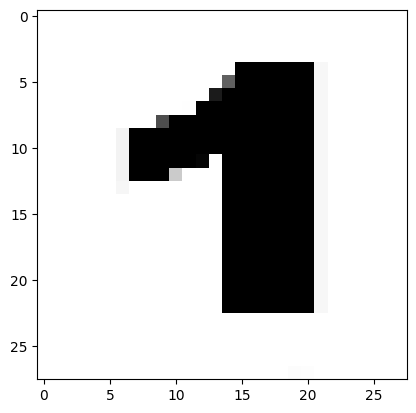

In [ ]:
# отобразить img
import matplotlib.pyplot as plt
plt.imshow(img_gray, cmap='gray')
plt.show()


In [ ]:
# пороговая обработка img
# ret, thresh1 = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
ret, thresh1 = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY_INV)

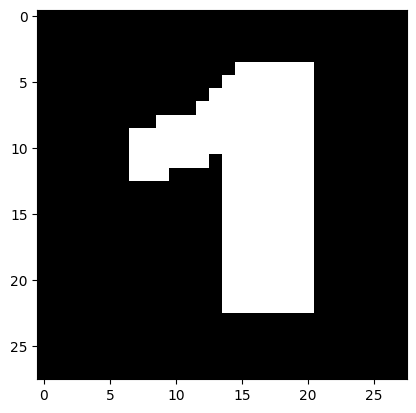

In [ ]:
# отобразить img
plt.imshow(thresh1, cmap='gray')
plt.show()

In [ ]:
order = np.random.permutation(10)
order

array([2, 4, 1, 9, 6, 8, 7, 0, 5, 3])

In [ ]:
for start_index in range(0, 100, 10):
    print(start_index)

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
order = np.random.permutation(10)
batch_0 = x[order[0:5]]
batch_1 = x[order[5:10]]
print(x)
print(order)
print(batch_0)
print(batch_1)

[0 1 2 3 4 5 6 7 8 9]
[6 9 1 4 0 2 8 3 7 5]
[6 9 1 4 0]
[2 8 3 7 5]


In [ ]:
x = torch.tensor( [ [0,8,2], [3,4,6] ] )
x.argmax(dim=1), x.argmax(dim=0)

(tensor([1, 2]), tensor([1, 0, 1]))

In [ ]:
class Model():
    def __init__(self, obj):
        self.obj = obj

    def __call__(self):
       return self.forward()

    def forward(self):
        return f"Выполняется метод forward объекта {self.obj}"
        #return f"Выполняется метод forward объекта {self.__class__.__name__}"


In [ ]:
model = Model('model')
print(model())
print(model.forward())

Выполняется метод forward объекта model
Выполняется метод forward объекта model


In [ ]:
a = [1,2,3,4]
a_1 = [[1,2,3,4]]
a_2 = [[[1,2,3,4]]]
print(a[0])
print(a_1[0][1])
print(a_2[0][0][2])

1
2
3


In [ ]:
class Model():
    def __init__(self, obj):
        self.obj = obj

    def __call__(self):
       return self.forward()

    def forward(self):
        return f"Выполняется метод forward объекта {self.obj}"
        #return f"Выполняется метод forward объекта {self.__class__.__name__}"
